# MATH 307 Assignment 1 (Updated June 2)

### Instructions

* There are 4 problems and 20 total points.
* Write your solutions in the cells below.
* You may work on these problems with others but you must write your solutions on your own.
* Execute the test cells to verify that your solutions pass.
* **Grading includes hidden tests!** Your solution may not be completely correct even if it passes all tests below.
* Make sure your notebook executes correctly in order from top to bottom.
* Submit this notebook to Canvas

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import animation

## Exercise 1: Creating matrices with NumPy functions

Use a combination of the NumPy functions `numpy.eye`, `numpy.diag`, `numpy.ones` and `numpy.repeat` to create the $N \times N$ matrix

$$
B = 
\left[
\begin{array}{ccccc}
1 + 2p & -p & & & \\
-p & 1 + 2p & -p & & \\
& & \ddots & & \\
& & -p & 1 + 2p & -p \\
& & & -p & 1 + 2p \\
\end{array}
\right]
$$

for $p=1/5$ and $N = 100$.

In [2]:
# YOUR CODE HERE
# YOUR CODE HERE
p = 1/5 
N = 100
t = np.ones(N)
t1 = np.ones(N)
a = 2*p + t
b = (-p) *t1


print(a[0:N].shape)
print(b[1:N].shape)
B = np.diag(a[0:N]) + np.diag(b[1:N],1) + np.diag(b[1:N],-1)
print(B.shape)
print(type(B))



(100,)
(99,)
(100, 100)
<class 'numpy.ndarray'>


In [3]:
# Verify B is a NumPy array
assert isinstance(B,np.ndarray)
print("Exercises 1 Test 1: Success!")

Exercises 1 Test 1: Success!


In [4]:
# Verify B has the correct size
assert B.shape == (100,100)
print("Exercises 1 Test 2: Success!")

Exercises 1 Test 2: Success!


In [5]:
# Verify B has correct values
assert np.allclose(B[:3,:3],np.array([[1+2/5,-1/5,0],[-1/5,1+2/5,-1/5],[0,-1/5,1+2/5]]))
print("Exercises 1 Test 3: Success!")

Exercises 1 Test 3: Success!


## Exercise 2: Positive definite matrices

Use your code from the previous question and the code below to plot the eigenvalues of $B$ for different values $p$ and $N$.

```
evals,evecs = la.eig(B)
plt.plot(np.sort(evals.real),'b.')
```

Based on your observation, determine if the following statement is `True` or `False`:

> The matrix $B$ is positive definite for any postive value $p>0$ and integer $N$.

Assign `True` or `False` to the variable `posdef` in the cell below.

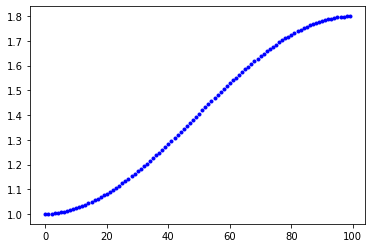

In [6]:
# YOUR CODE HERE
evals,evecs = la.eig(B)
plt.plot(np.sort(evals.real),'b.')

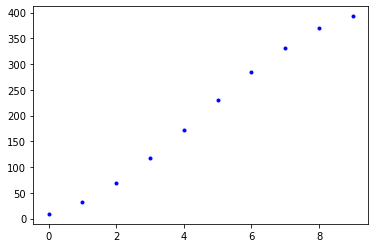

In [7]:
p = 100 
N = 10
t = np.ones(N)
t1 = np.ones(N)
a = 2*p + t
b = (-p) *t1
B1 = np.diag(a[0:N]) + np.diag(b[1:N],1) + np.diag(b[1:N],-1)
evals,evecs = la.eig(B1)
plt.plot(np.sort(evals.real),'b.')

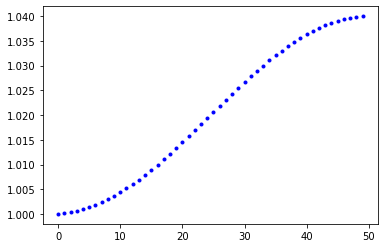

In [8]:
p = 0.01
N = 50
t = np.ones(N)
t1 = np.ones(N)
a = 2*p + t
b = (-p) *t1
B2 = np.diag(a[0:N]) + np.diag(b[1:N],1) + np.diag(b[1:N],-1)
evals,evecs = la.eig(B2)
plt.plot(np.sort(evals.real),'b.')



In [9]:
# A practical way to check
# A is positive-definite if all the diagonal entries are positive, 
#and each diagonal entry is greater than the sum of the absolute values of all other entries 
# in the corresponding row/column.
posdef = True

In [10]:
# Verify posdef is defined as True or False
assert isinstance(posdef,bool)
print("Exercises 2 Test 1: Success!")

Exercises 2 Test 1: Success!


## Exercise 3: Finite difference method for the heat equation

Consider the heat equation with homogeneous boundary conditions

$$
u_t = \alpha u_{xx} \ , \ \ u(0,t) = u(1,t) = 0 \ , \ \ u(x,0) = F(x)
$$

where $F(x)$ is the initial temperature distribution. The solution $u(x,t)$ is the temperature at position $x$ and time $t$ in a uniform rod of length $1$. The Crank-Nicolson method is a stable finite difference method for the heat equation. In matrix notation, the Crank-Nicolson method is

$$
B \mathbf{u}_{j+1} = A \mathbf{u}_j
$$

where $A$ and $B$ are $N \times N$ matrices

$$
B = 
\left[
\begin{array}{ccccc}
1 + 2p & -p & & & \\
-p & 1 + 2p & -p & & \\
& & \ddots & & \\
& & -p & 1 + 2p & -p \\
& & & -p & 1 + 2p \\
\end{array}
\right]
\hspace{10mm}
A = 
\left[
\begin{array}{ccccc}
1 - 2p & p & & & \\
p & 1 - 2p & p & & \\
& & \ddots & & \\
& & p & 1 - 2p & p \\
& & & p & 1 - 2p \\
\end{array}
\right]
\hspace{10mm}
\mathbf{u}_j = \begin{bmatrix} u_{1,j} \\ u_{2,j} \\ \vdots \\ u_{N,j} \end{bmatrix}
$$


$$
p = \frac{\alpha k}{2 h^2}
\hspace{10mm}
h = \frac{1}{N+1}
\hspace{10mm}
k = \frac{t_f}{M}
$$

We don't need to know all the details of the Crank-Nicholson method for this exercise. The idea is that each vector $\mathbf{u}_j$ represents the temperature distribution at time $t_j = j k$ (that is after $j$ time steps $k$). The goal is to compute the solution $\mathbf{u}_{j+1}$ of the system $B \mathbf{u}_{j+1} = A \mathbf{u}_j$ for each $j=1,\dots,M$. Since we are solving a system with the same coefficient matrix $B$ over and over again, we should use the Cholesky factorization to avoid unecessary computations.

Copy and paste the following code into the next cell and  modify it following the steps below.

```
alpha = 0.02; tf = 10;
N = 100; M = 200;
h = 1/(N + 1); k = tf/M;
p = alpha*k/(2*h**2)

A = # STEP 1: Define matrix A
B = # STEP 2: Define matrix B
U = np.zeros([N+2,M+1])
x = np.linspace(0,1,N+2)
U[:,0] = 1 - np.cos(4*np.pi*x)
L = # STEP 3: Compute Cholesky decomposition of B
for j in range(0,M):
    uj = U[1:N+1,j]
    y = # STEP 4: Solve Ly = A@uj
    z = # STEP 5: Solve L.T z = y
    U[1:N+1,j+1] = z
```

1. Modify your code from Exercise 1 to create matrix A.
2. Modify your code from Exercise 1 to create matrix B.
3. Use the function `scipy.linalg.cholesky` to compute the Cholesky factorization $B = LL^T$ (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cholesky.html))
4. Use the function `scipy.linalg.solve_triangular` to solve the lower triangular system $Ly = A\mathbf{u}_j$ (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)).
5. Use the function `scipy.linalg.solve_triangular` to solve the upper triangular system $L^Tz = y$ (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)).

The result is the solution of the heat equation with initial distribution $F(x) = 1 - \cos(4\pi x)$. Run the cells below to animate your result.

In [11]:
# YOUR CODE HERE


alpha = 0.02; tf = 10;
N = 100; M = 200; # 100 200
h = 1/(N + 1); k = tf/M;
p = alpha*k/(2*h**2)

t = np.ones(N+2)
a = t - 2*p
b = t + 2*p
c = p*t
d = -p*t

A = np.diag(a[1:N+1]) + np.diag(c[1:N],1) + np.diag(c[2:N+1],-1)# STEP 1: Define matrix A
B = np.diag(b[1:N+1]) + np.diag(d[1:N],1) + np.diag(d[2:N+1],-1)# STEP 2: Define matrix B
U = np.zeros([N+2,M+1])
x = np.linspace(0,1,N+2)
U[:,0] = 1 - np.cos(4*np.pi*x)
L = la.cholesky(B,lower=True)# STEP 3: Compute Cholesky decomposition of B
for j in range(0,M):
    uj = U[1:N+1,j]
    y = la.solve_triangular(L, A@uj, lower=True)   # STEP 4: Solve Ly = A@uj #LOOK at the documentation
    z = la.solve_triangular(L.T, y, lower=False)# STEP 5: Solve L.T z = y   #L.T is upper
    U[1:N+1,j+1] = z
    


print(type(A))
print(type(B))
print(A.shape)
print(B.shape)




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 100)
(100, 100)


In [12]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(np.min(U), np.max(U)))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, U[:,i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=M+1)
anim.save('heat.mp4',fps=M/tf)
plt.close()

In [13]:
from IPython.display import Video
Video("heat.mp4")

In [14]:
# Check A is defined and has the correct shape
assert isinstance(A,np.ndarray)
assert A.shape == (100,100)
print("Exercises 3 Test 1: Success!")

Exercises 3 Test 1: Success!


In [15]:
# Check A has the correct values
assert np.allclose(A[:3,:3],np.array([[1-2*p,p,0],[p,1-2*p,p],[0,p,1-2*p]]))
print("Exercises 3 Test 2: Success!")

Exercises 3 Test 2: Success!


In [16]:
# Check B has the correct values
assert np.allclose(B[:3,:3],np.array([[1+2*p,-p,0],[-p,1+2*p,-p],[0,-p,1+2*p]]))
print("Exercises 3 Test 3: Success!")

Exercises 3 Test 3: Success!


In [17]:
# Verify the Cholesky factor L
assert np.allclose(L@L.T,B)
print("Exercises 3 Test 4: Success!")

Exercises 3 Test 4: Success!


In [18]:
U[:,-1].mean()

0.11893355541023438

In [19]:
# Verify the average temperature at the last time step
assert np.allclose(U[:,-1].mean(), 0.11893355541023455)
print("Exercises 3 Test 5: Success!")

Exercises 3 Test 5: Success!


## Exercise 4: Condition number of Vandermonde matrices

Let $t_k = k/N$, $k=0,\dots,N$, be $N+1$ equally spaced points from $t_0 = 0$ to $t_N = 1$ and let $A_N$ be the corresponding Vandermonde matrix. We have seen that the solution of the system $A_N \mathbf{c} = \mathbf{y}$ (for some vector $\mathbf{y}$ of $y$ values) is the vector $\mathbf{c}$ of coefficients for the unique interpolating polynomial of degree $N$. We have also seen that Vandermonde matrices are badly ill-conditioned. The purpose of this exercises it to determine how badly ill-conditioned.

The following code computes the condition number $C_N = \mathrm{cond}(A_N)$ for $A_N$ for $N=1,\dots,10$ and plots $N$ versus $\log_{10}(C_N)$.

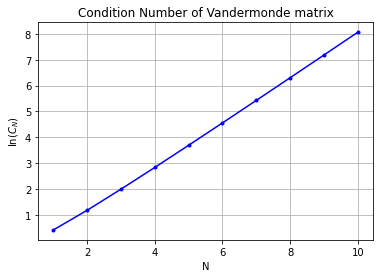

In [20]:
Cs = []
Nmax = 10
Ns = np.arange(1,Nmax+1)
for N in Ns:
    t = np.linspace(0,1,N+1)
    A_N = np.vander(t)
    cond_A_N = np.linalg.cond(A_N)
    Cs.append(cond_A_N)
plt.plot(Ns,np.log10(Cs),'b.-')
plt.grid(True), plt.title('Condition Number of Vandermonde matrix'), plt.xlabel('N'), plt.ylabel('$\ln(C_N)$')
plt.show()

(a) Setup and solve the normal equations for the coefficients $c_0$ and $c_1$ in the logarithmic model

$$
\log_{10}(C_N) = c_0 + c_1 N
$$

You should be able to copy, paste and modify the code from our [MATH 307 notebook on data fitting](https://github.com/patrickwalls/math307/blob/master/06_least_squares_regression.ipynb). Save the coefficients as variables `c0` and `c1`.

In [21]:
# YOUR CODE HERE
A = np.column_stack([np.ones(len(Ns)),Ns])
c = la.solve(A.T @ A, A.T @ np.log10(Cs))
c0 = c[0]
c1 = c[1]
print(f'c0 is {c0}, c1 is {c1}')



c0 is -0.534701019706969, c1 is 0.8545530042205068


In [22]:
# Check if c0 and c1 are defined
assert isinstance(c0,np.float64)
assert isinstance(c1,np.float64)
print("Exercises 4 Test 1: Success!")

Exercises 4 Test 1: Success!


In [23]:
# Check if c0 has the correct value (this cell contains a hidden test)
assert isinstance(c0,np.float64)
print("Exercises 4 Test 2: Success!")

Exercises 4 Test 2: Success!


In [24]:
# Check if c1 has the correct value (this cell contains a hidden test)
assert isinstance(c1,np.float64)
print("Exercises 4 Test 3: Success!")

Exercises 4 Test 3: Success!


(b) If we construct the Vandermonde matrix $A_N$ for $N = 20$, use the model compute above to estimate the exponent $k$ in the condition number $\mathrm{cond}(A_N) = 10^k$. Assign the value to the variable `k` in the next cell.

In [25]:
# YOUR CODE HERE
Nmax = 20
Ns = Nmax
t = np.linspace(0,1,Ns+1)
A_N_20 = np.vander(t)
cond_A_N_20 = np.linalg.cond(A_N_20)
k = np.log10(cond_A_N_20)
print(k)



16.9321497712377


In [26]:
# Check k has the correct value (this cell contains a hidden test)
assert isinstance(k,np.float64)
print("Exercises 4 Test 4: Success!")

Exercises 4 Test 4: Success!
